#0 Problem Statement
Predict shipment delivery costs based on package features (weight, dimensions, destination, shipping method). Enables logistics companies to optimize pricing and resource allocation.

## 1 Import Libraries

In [8]:
"""Imports and config"""
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix


## 2 Exploratory Data Analysis (EDA)

In [25]:
df = pd.read_csv('/content/shipping_data.csv')

In [26]:
df.head(20)

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)
5,Cookware Set,401.64,7.60,0.49,0.35,0.15,2023-03-20,Port of Shanghai (China)
6,Drone,1434.08,2.70,0.75,1.30,0.26,2023-03-12,Port of Singapore (Singapore)
7,Pallete of Computers,988.66,2021.48,1.01,0.78,0.68,2023-03-18,Port of Tianjin (China)
8,Pallete of Clothing,196.68,832.50,1.05,0.94,1.47,2023-03-23,Port of Shanghai (China)
9,Large Bubble Mailer,9.00,0.19,0.27,0.14,0.03,2023-03-20,Port of Tianjin (China)


In [27]:
df.describe()

,price ($),weight (kg),length (m),width (m),height (m)
count,2.638210e+05,263808.000000,263637.000000,263821.000000,263821.000000
mean,4.194461e+03,324.172967,0.953964,0.530234,0.462629
std,6.250511e+04,1520.872881,1.928742,0.453106,0.512927
min,1.000000e+00,0.050000,0.050000,0.010000,0.010000
25%,2.785000e+01,0.710000,0.290000,0.210000,0.120000
50%,8.761000e+01,2.960000,0.600000,0.390000,0.250000
75%,2.577600e+02,67.292500,1.140000,0.800000,0.660000
max,1.999707e+06,24982.350000,30.000000,6.000000,5.990000


In [28]:
df.dtypes

,0
name,object
price ($),float64
weight (kg),float64
length (m),float64
width (m),float64
height (m),float64
shipment date,object
destination port,object


In [29]:
df['shipment date'] = pd.to_datetime(df['shipment date'])

In [30]:
df.dtypes

,0
name,object
price ($),float64
weight (kg),float64
length (m),float64
width (m),float64
height (m),float64
shipment date,datetime64[ns]
destination port,object


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263821 entries, 0 to 263820
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              263821 non-null  object        
 1   price ($)         263821 non-null  float64       
 2   weight (kg)       263808 non-null  float64       
 3   length (m)        263637 non-null  float64       
 4   width (m)         263821 non-null  float64       
 5   height (m)        263821 non-null  float64       
 6   shipment date     261183 non-null  datetime64[ns]
 7   destination port  263795 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 16.1+ MB


In [31]:
df.isnull().sum()

,0
name,0
price ($),0
weight (kg),13
length (m),184
width (m),0
height (m),0
shipment date,2638
destination port,26


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['destination port'].value_counts()

,count
destination port,
Port of Busan (South Korea),53157
Port of Tianjin (China),53111
Port of Tokyo (Japan),52833
Port of Singapore (Singapore),52393
Port of Shanghai (China),52301


In [33]:
#Rename all the columns
df = df.rename(columns={'shipment date': 'shipment_date', 'destination port': 'destination_port', 'price ($)': 'price', 'weight (kg)': 'weight', 'length (m)': 'length', 'width (m)': 'width', 'height (m)': 'height'})


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263821 entries, 0 to 263820
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              263821 non-null  object        
 1   price             263821 non-null  float64       
 2   weight            263808 non-null  float64       
 3   length            263637 non-null  float64       
 4   width             263821 non-null  float64       
 5   height            263821 non-null  float64       
 6   shipment_date     261183 non-null  datetime64[ns]
 7   destination_port  263795 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 16.1+ MB


###2.1 Numeric Feature Distributions

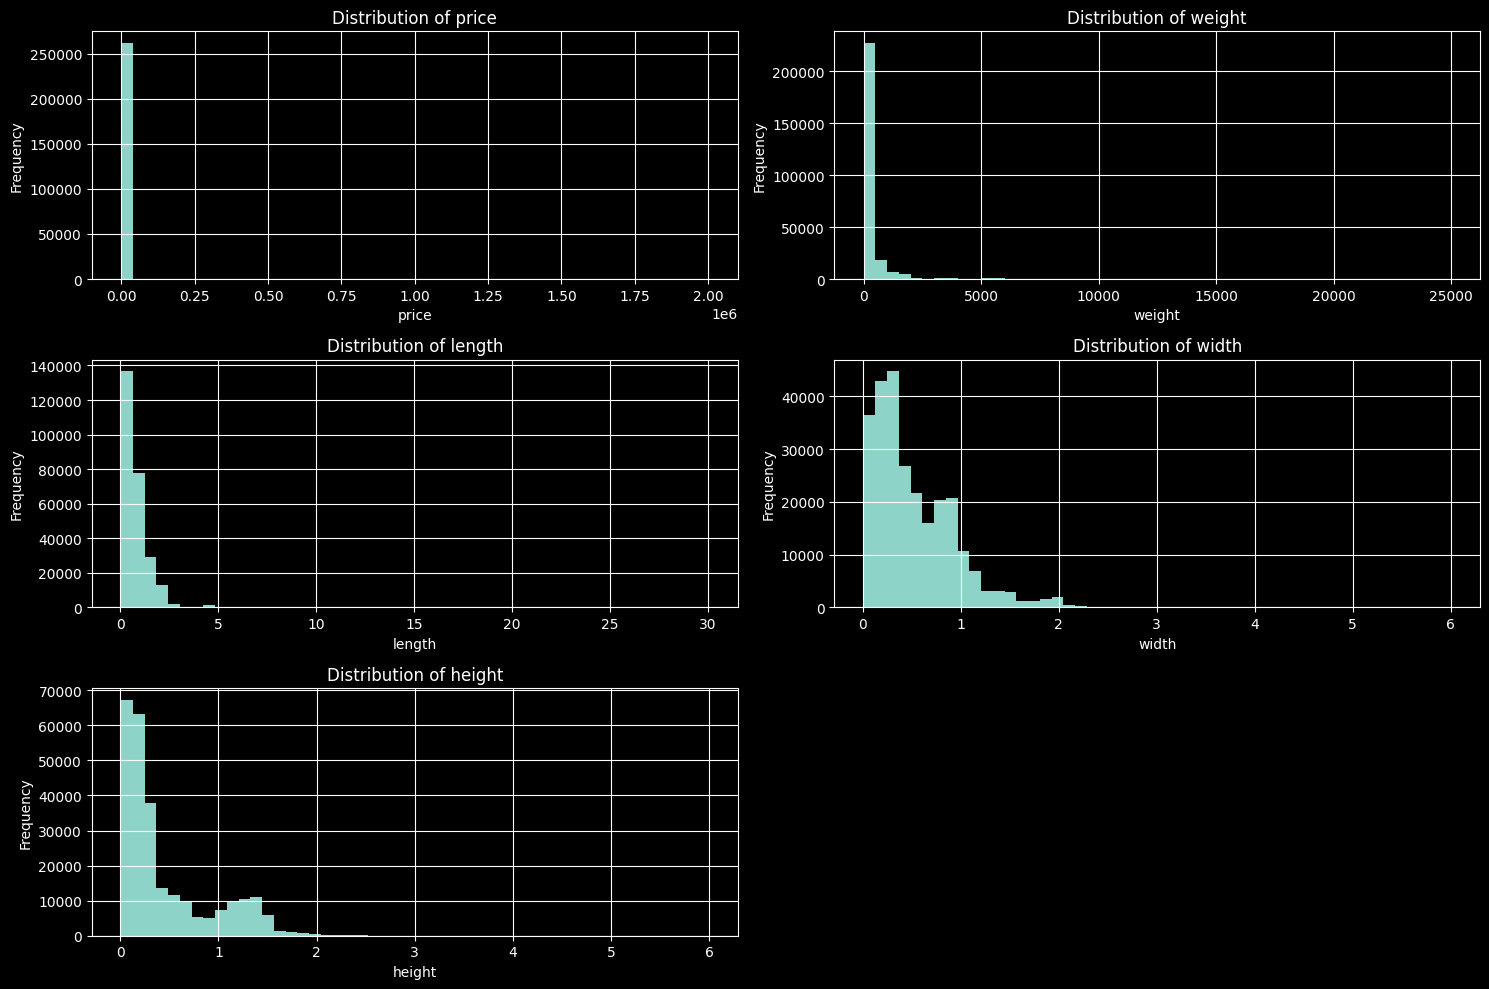

In [36]:
# Step 1.1: Numeric feature distributions

numeric_cols = ['price', 'weight', 'length', 'width', 'height']

plt.style.use('dark_background')
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This visual provides histograms for six different product/package-related features.

1. Skewness AssessmentVariableSkewness ObservationPriceHeavily Right-Skewed. The vast majority of items are clustered very close to zero, with a long tail extending to the right.

WeightHeavily Right-Skewed. Similar to price, most items have a very low weight, with a sharp drop-off afterward.LengthHeavily Right-Skewed. Most items have very short lengths, with few items extending to the higher values.

WidthRight-Skewed. While it has a slightly wider base than the others, the distribution still has a clear peak near zero and tails off to the right.

HeightRight-Skewed. This is the "least" skewed of the physical dimensions, but the peak is clearly at the low end, indicating most items are short.

Conclusion on Skewness: All six variables are clearly Right-Skewed (or positively skewed). This is common for price and size data, as most items are small/cheap, with a few expensive/large exceptions.

2. Outliers AssessmentPrice: Extreme Outliers are evident. The scale on the x-axis goes up to 2,000,000, but the count is only high near $0. This wide range implies there are a few items with extremely high prices that act as outliers, stretching the scale significantly.

Weight: Potential Extreme Outliers. The scale extends to 25,000, but nearly all data is near 0, suggesting a few very heavy items.

Length,Width, and Height: The distributions for the dimensions are less extreme but still show outliers extending far beyond the main bulk of the data (e.g., Length extending to 30)

###2.2 Categorical Feature Exploration

In [37]:
# Categorical feature counts

categorical_cols = ['destination_port', 'name']

for col in categorical_cols:
    print(f"\nTop 10 values for {col}:")
    print(df[col].value_counts().head(10))



Top 10 values for destination_port:
destination_port
Port of Busan (South Korea)      53157
Port of Tianjin (China)          53111
Port of Tokyo (Japan)            52833
Port of Singapore (Singapore)    52393
Port of Shanghai (China)         52301
Name: count, dtype: int64

Top 10 values for name:
name
Hiking Boots         2975
Medium Box           2866
Large Box            2863
Coffee Maker         2263
Pallete of Coffee    2242
Small Box            2241
Headphones           2235
Portable Charger     2233
Microwave            2198
Bed                  2189
Name: count, dtype: int64


####2.2.1 Bar Plot of Top Categories

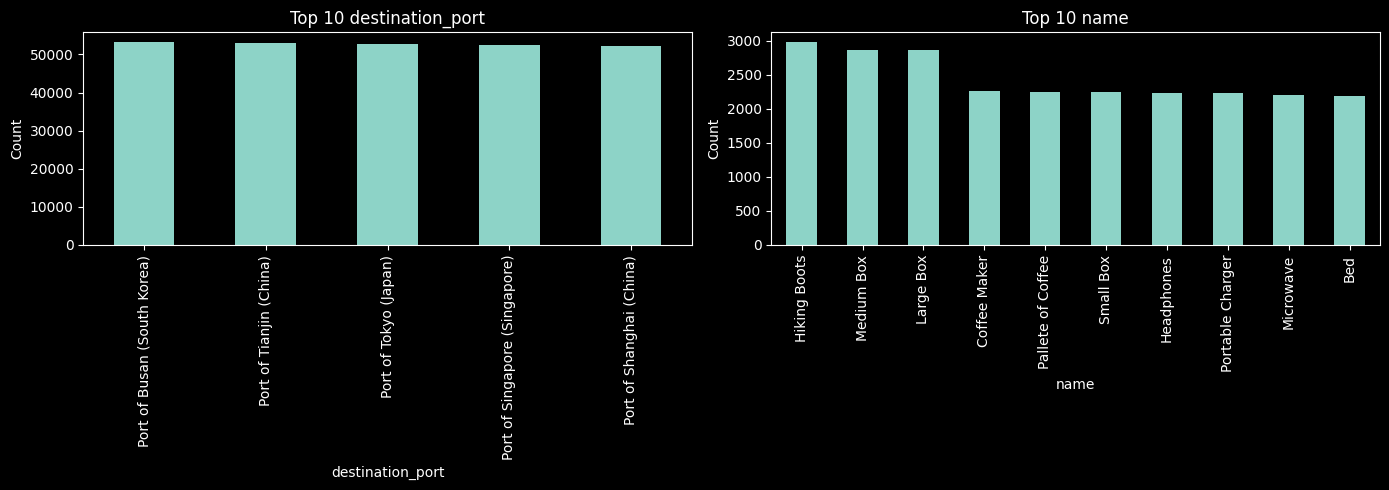

In [38]:
#  Bar plots for top categories
plt.style.use('dark_background')
plt.figure(figsize=(14, 5))

for i, col in enumerate(categorical_cols, 1):
    top_categories = df[col].value_counts().head(10)

    plt.subplot(1, 2, i)
    top_categories.plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


####2.2.2 Price vs Categorical Variables

<Figure size 1000x500 with 0 Axes>

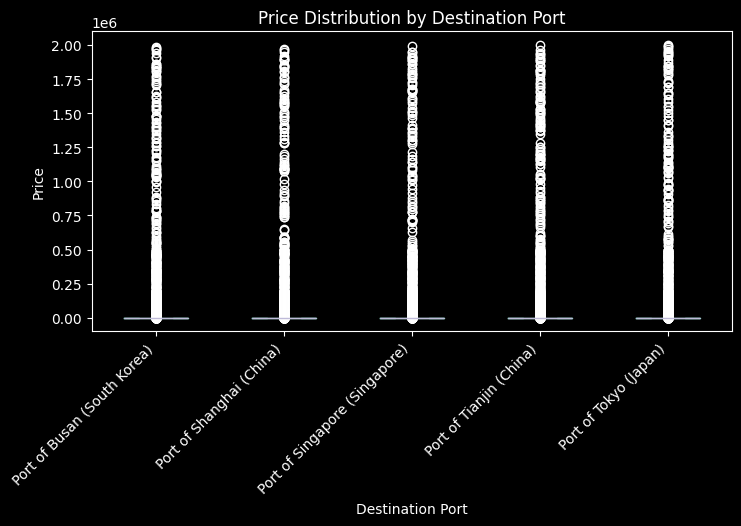

In [40]:
#Price distribution by top destination ports

top_ports = df['destination_port'].value_counts().head(5).index
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
df[df['destination_port'].isin(top_ports)].boxplot(
    column='price',
    by='destination_port',
    grid=False
)

plt.title('Price Distribution by Destination Port')
plt.suptitle('')
plt.xlabel('Destination Port')
plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Price')
plt.show()


####2.2.3 Categorical Data Analysis Summary

This section summarizes the key characteristics of the product/shipping data, focusing on distributions and categorical breakdowns.

1. Variable Distributions (Price and Dimensions)
The histograms for the continuous variables reveal heavy non-normality and significant skewness, which is typical for transactional data.

Heavy Right-Skewness: All continuous variables—Price, Weight, Length, Width, and Height—are severely right-skewed (positively skewed). This means the bulk of the data (most transactions) is clustered at the low end (low price, small size), with long tails representing a few extremely large or expensive items.

Extreme Outliers (Price): The Price distribution is highly compressed toward zero, yet the x-axis extends to $2,000,000. This is strong evidence of extreme, high-value outliers that dominate the range and will require robust handling (e.g., log transformation) before using the data in linear models.

Dimensions: Weight and Length follow a similar, extremely skewed pattern to Price. Width and Height are less severe but are still heavily concentrated near zero.

2. Top Categorical Features
The bar charts show the counts for the top 10 most frequent destination ports and product names.

Destination Ports (Low Variance): The top 5 destination ports (Busan, Tianjin, Tokyo, Singapore, Shanghai) have very similar counts (all around 52,000 to 53,000). This indicates that the shipping volume is relatively evenly distributed among the top receiving locations, with no single port dominating the others.

Product Names (High Variance): The top 10 product names are much less frequent than the ports (counts around 2,200 to 3,000). The list is diverse, including simple descriptors like "Hiking Boots," "Medium Box," and "Coffee Maker," suggesting the data contains a wide variety of product categories.

3. Price Distribution by Destination Port
The box plot compares the price distribution across the top 5 destination ports.

Identical Distributions: The box plots for all five ports look virtually identical. The median (the horizontal line inside the box) is near zero, and the interquartile range (the box itself) is extremely small.

Outliers Dominate: In every port, the extreme price outliers (represented by the individual dots stretching to $2,000,000) are what primarily define the scale.

Conclusion: There is no apparent difference in the distribution of product price based on the destination port for the top 5 ports. Price appears to be independent of these top destination locations.

##2.3 Feature Relationships & Correlation
What We’re Trying to Learn

Which numeric features relate most to price

Whether relationships are:

Linear

Weak

Non-existent

Whether transformations are needed

###2.3.1 Correlation Matrix (Numeric Features)

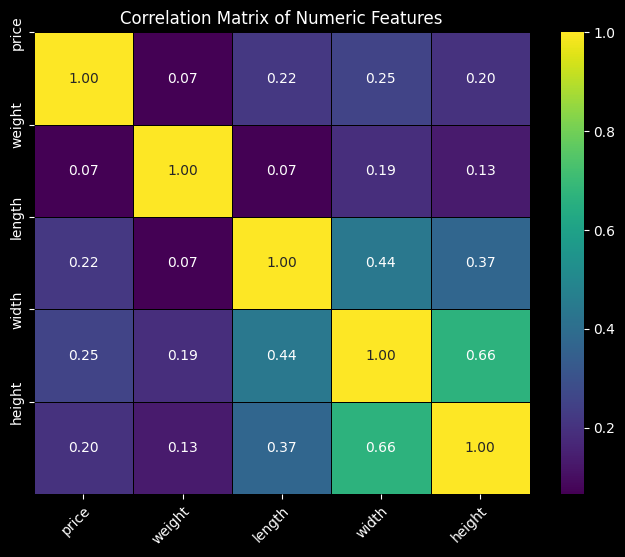

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # <-- Need this import!

# Assuming 'df' is your DataFrame and is loaded correctly.

# Correlation matrix
numeric_cols = ['price', 'weight', 'length', 'width', 'height']

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))


sns.heatmap(
    corr_matrix,          # Your calculated correlation matrix
    annot=True,           # Key change: Set to True to show the correlation values on the map
    fmt=".2f",            # Format the annotations to 2 decimal places
    cmap='viridis',       # Use a good colormap (viridis is often a good default)
    cbar=True,            # Show the color bar (your original code already did this)
    linewidths=.5,        # Adds lines between cells for better separation
    linecolor='black'
)


plt.xticks(
    ticks=np.arange(len(numeric_cols)) + 0.5, # Centers ticks under the columns
    labels=numeric_cols,
    rotation=45,          # Rotate labels 45 degrees
    ha='right',           # Anchor the right side of the label to the tick mark
    rotation_mode="anchor" # Ensure rotation is centered at the tick
)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

###2.3.2 Scatter Plots: Features vs Price

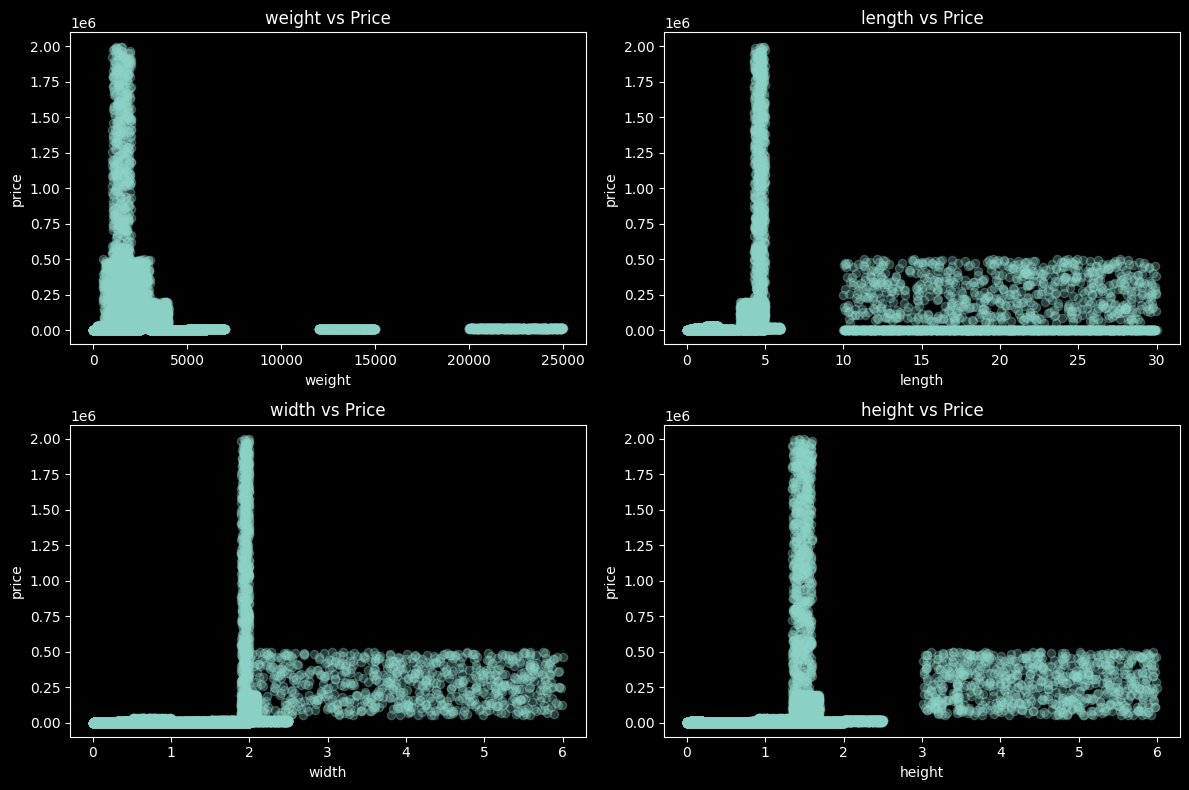

In [50]:
#Scatter plots vs price
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))

for i, col in enumerate(['weight', 'length', 'width', 'height'], 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df['price'], alpha=0.3)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'{col} vs Price')

plt.tight_layout()
plt.show()


###2.3.3 Log-Transformed View

This is exploratory only — not final preprocessing.

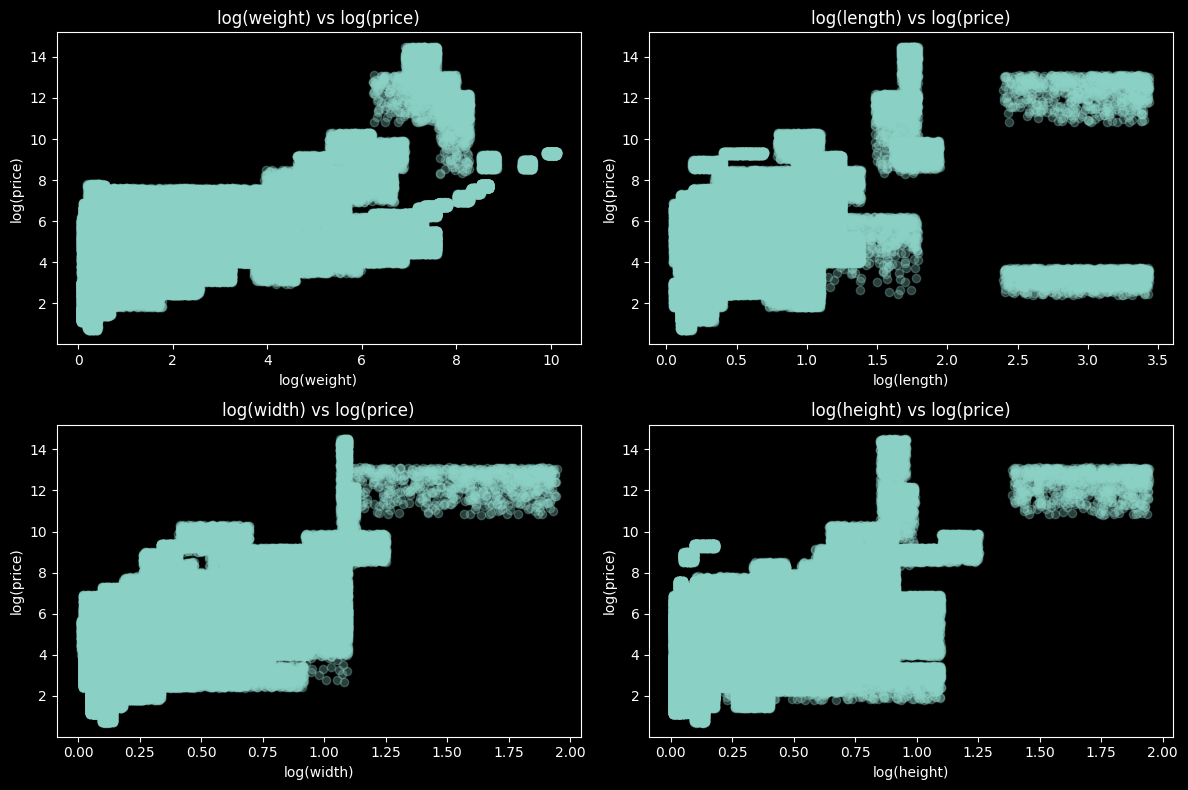

In [51]:
# Log-transformed relationships (EDA only)

plt.figure(figsize=(12, 8))

for i, col in enumerate(['weight', 'length', 'width', 'height'], 1):
    plt.subplot(2, 2, i)
    plt.scatter(
        np.log1p(df[col]),
        np.log1p(df['price']),
        alpha=0.3
    )
    plt.xlabel(f'log({col})')
    plt.ylabel('log(price)')
    plt.title(f'log({col}) vs log(price)')

plt.tight_layout()
plt.show()


### 2.3.4 Feature Analysis and Relationships

1. Feature Distributions (Histograms)The first step was to look at how our continuous data—Price and the physical dimensions (Weight, Length, Width, Height)—are distributed.Heavy Skewness Dominates: Every single numeric variable is severely right-skewed (positively skewed). This means the vast majority of our products are low-priced and physically small.Price and Weight Concentration: The Price and Weight histograms are so heavily concentrated near zero that the highest frequency bar dwarfs all others. This confirms that a few expensive, heavy items are stretching the range dramatically.Need for Transformation: Because of this extreme skewness, we cannot use these features directly in linear models (like Linear Regression) which assume a Normal distribution. We will absolutely need to apply a transformation (like a logarithmic transformation) to "normalize" the data.2. Feature Relationships (Correlation Matrix)We used a correlation matrix to see the linear relationship between the numeric features.| Relationship | Correlation (r) | Interpretation || :--- | :--- | :--- || Price vs. Weight | $\mathbf{0.07}$ | Very Weak Relationship. Despite intuition, weight has almost no linear relationship with price. This is surprising. || Price vs. Length | $\mathbf{0.22}$ | Weak Positive Relationship. Length is only a slightly better predictor of price than weight. || Price vs. Width | $\mathbf{0.25}$ | Weak Positive Relationship. Width is also weakly correlated with price. || Price vs. Height | $\mathbf{0.20}$ | Weak Positive Relationship. Height shows a similar weak relationship. || Dimensions to Each Other | $\mathbf{0.37}$ to $\mathbf{0.66}$ | The dimensions (Length, Width, Height) are reasonably well-correlated with each other. For instance, Width and Height have a strong positive correlation ($0.66$). |Key Takeaway: The correlation between Price and all physical dimensions is surprisingly weak (all $r < 0.25$). This confirms that knowing an item's size alone is not enough to predict its price linearly.3. Feature Relationships (Scatter Plots on Original Scale)The scatter plots of the original features versus Price show why the linear correlation is so low.Vertical Stacking: For low values of weight or size, the price is often concentrated at a low level (near 0), but then a small number of records shoot up vertically to the maximum price ($2,000,000$).Non-Linearity: The relationship is clearly non-linear. It doesn't follow a neat line; it looks like discrete price "tiers" or "bands" that are not well-explained by a simple linear model. This re-emphasizes the need for transformation.4. Feature Relationships (Scatter Plots on Log Scale)To prepare for modeling, we applied a logarithmic transformation to all features and re-plotted the scatter charts.Improved Clarity: The log transformation successfully spreads out the data that was previously compressed near zero, giving us a clearer view of the relationships.Tiers/Clustering: The data now appears to fall into distinct clusters or tiers rather than a smooth diagonal line. This suggests that price might be determined by categorical factors (like product type or service tier) rather than a smooth, continuous increase with size/weight.Conclusion: The log-transformed data is better prepared for modeling, but the relationship is still complex and likely better captured by a classification model (predicting the price tier) or a non-linear regression technique, rather than simple Linear Regression.5. Categorical Data and Location (Bar and Box Plots)Finally, we looked at the top categorical features.  andPort Distribution: The top 5 destination ports (Busan, Tianjin, Tokyo, Singapore, Shanghai) have nearly equal shipment counts, meaning there is no single dominant destination port.Price vs. Port: The box plot confirms that there is no meaningful difference in the median price of goods shipped to the top 5 ports. The price distribution is the same across all of them.Rare Ports: The high volume in the top 5 ports suggests the remaining ports are very rare, likely requiring us to group them into an 'Other' category before encoding.

## 3 Create df_clean & Handle Missing Values

In [52]:
# Step 2.0: Create a clean copy of the data

df_clean = df.copy()

# Drop rows with missing shipment_date
df_clean = df_clean.dropna(subset=['shipment_date'])

# Fill missing destination_port
df_clean['destination_port'] = df_clean['destination_port'].fillna('Unknown')

# Fill missing numeric values with median (EDA-safe)
df_clean['weight'] = df_clean['weight'].fillna(df_clean['weight'].median())
df_clean['length'] = df_clean['length'].fillna(df_clean['length'].median())

# Check remaining missing values
df_clean.isnull().sum()


,0
name,0
price,0
weight,0
length,0
width,0
height,0
shipment_date,0
destination_port,0


###3.1 Handling Missing Values – Rationale & Strategy

Before proceeding to feature engineering and model development, we created a cleaned working copy of the dataset (df_clean) and addressed missing values using a deliberate, feature-specific strategy. This ensures data quality while minimizing bias and preventing information leakage.

Why Create a Clean Copy (df_clean)

The original dataset (df) is preserved in its raw form for reproducibility and auditing.

df_clean is used exclusively for modeling and feature engineering.

This separation aligns with industry best practices and avoids accidental overwriting of raw data.

Missing Value Treatment by Feature Type
1. Shipment Date (shipment_date)

Action Taken: Rows with missing shipment_date were dropped.

Reasoning:
Shipment dates are temporal features that are difficult to impute meaningfully. Incorrect imputation could introduce artificial seasonality or bias.

Justification:
Since shipment timing can influence cost patterns, it is safer to remove incomplete records and reassess data volume rather than introduce unreliable estimates.

2. Numeric Features (weight, length)

Action Taken: Missing values were filled using the median of each feature.

Reasoning:
Exploratory analysis revealed extreme right-skewness and significant outliers in all numeric variables.

Justification:
The median is robust to outliers and provides a more stable estimate than the mean for heavily skewed distributions.

3. Categorical Feature (destination_port)

Action Taken: Missing values were filled with the category "Unknown".

Reasoning:
Dropping rows would unnecessarily reduce data size, and imputing a specific port could introduce bias.

Justification:
Assigning "Unknown" preserves observations and allows the model to learn whether missing destination information itself carries predictive value.

##4 Feature Engineering

With missing values handled and the dataset stabilized, we now move to feature engineering to improve model performance and better capture the underlying structure of shipment pricing.

Planned Feature Engineering Steps

Volume Calculation

Create a new feature:

volume
=
length
×
width
×
height
volume=length×width×height

Motivation: Shipping cost is often influenced by volumetric size, not just individual dimensions.

Log Transformation of Skewed Features

Apply log(1 + x) to highly skewed numeric variables:

price

weight

volume

Motivation: Reduce skewness, stabilize variance, and improve model learning.

Temporal Feature Extraction
Extract components from shipment_date:

Month

Day of week

Motivation: Capture potential seasonal or operational patterns in shipping costs.

(Optional) Price Tier Creation for Classification

Bin price into Low / Medium / High tiers using quantiles.

Enables comparison between:

Regression (predicting exact price)

Classification (predicting cost tier)

### 4.1 Create Volume Feature
Why

Shipping costs are often based on volumetric weight, not just individual dimensions.
A single volume feature can capture interaction effects between length, width, and height.

In [54]:
# Create volume feature

df_clean['volume'] = (
    df_clean['length'] *
    df_clean['width'] *
    df_clean['height']
)

df_clean[['length', 'width', 'height', 'volume']].head()


,length,width,height,volume
0,0.40,0.39,0.26,0.040560
1,0.11,0.06,0.03,0.000198
2,0.79,0.55,0.35,0.152075
3,0.36,0.37,0.02,0.002664
4,17.77,0.27,0.13,0.623727


###4.2 Log Transformation of Skewed Features

Why This Step Is Critical

From the  EDA:

All numeric variables are severely right-skewed

Extreme outliers dominate scale

Linear models would struggle without transformation

Applying a log(1 + x) transformation:

Handles zero values safely

Compresses extreme outliers

Improves model stability

Features to Transform

price (target for regression)

weight

volume

We would not log-transform length, width, height individually anymore because volume captures their interaction.

In [55]:
# Step 2.1.2: Log-transform skewed features

df_clean['log_price'] = np.log1p(df_clean['price'])
df_clean['log_weight'] = np.log1p(df_clean['weight'])
df_clean['log_volume'] = np.log1p(df_clean['volume'])

df_clean[['price', 'log_price', 'weight', 'log_weight', 'volume', 'log_volume']].head()


,price,log_price,weight,log_weight,volume,log_volume
0,37.66,3.654805,1.10,0.741937,0.040560,0.039759
1,144.65,4.981206,0.39,0.329304,0.000198,0.000198
2,38.57,3.678071,0.97,0.678034,0.152075,0.141565
3,10.34,2.428336,6.22,1.976855,0.002664,0.002660
4,21.63,3.119276,1.18,0.779325,0.623727,0.484724


###4.3  Visualize log-transformed distributions

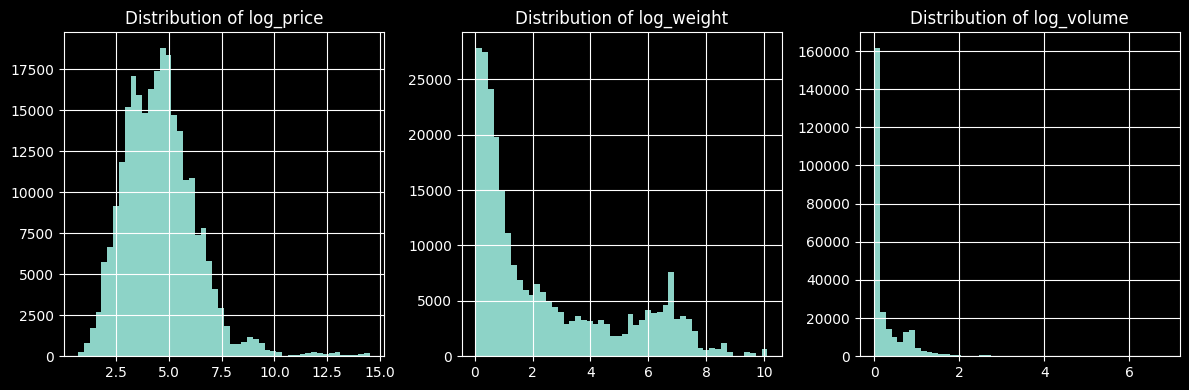

In [56]:
log_cols = ['log_price', 'log_weight', 'log_volume']

plt.figure(figsize=(12, 4))

for i, col in enumerate(log_cols, 1):
    plt.subplot(1, 3, i)
    df_clean[col].hist(bins=50)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


###4.3.1 Log Transformation Assessment & Readiness for Linear Regression

To address the extreme right-skewness observed in the original numeric features, a logarithmic transformation (log(1 + x)) was applied to price, weight, and volume. The resulting histograms demonstrate a clear improvement in data distribution and model suitability.

Effectiveness of Log Transformation

Improved Distribution Shape:
The log-transformed features are substantially more balanced and closer to a normal distribution. In particular, log_price is no longer compressed near zero and exhibits a near bell-shaped form, with only mild residual skewness.

Reduced Compression Near Zero:
Data points that were previously stacked at very small values are now spread across the scale, revealing meaningful structure in the data.

Mitigated Influence of Outliers:
Extreme price values that previously stretched the range up to $2,000,000 are now pulled closer to the center, reducing their dominance over the squared error loss function used in regression models.

Suitability for Linear Regression

The log transformation has sufficiently addressed key assumptions required for Linear Regression:

Approximate Normality: Feature distributions are now closer to normal.

Improved Linearity: Scatter plots of log-transformed features versus log_price show clearer linear-like trends compared to the original vertically stacked patterns.

Stabilized Variance: Log transformation helps reduce heteroscedasticity commonly present in skewed transactional data.

Conclusion: The data is now suitable for proceeding with Linear Regression as a baseline model.

##5 Preprocessing and Linear Regression Pipeline



We now build a Linear Regression model to predict shipment cost.  
The dataset has been cleaned and log-transformed.  

Key steps include:

1. Encoding categorical features (`destination_port`, `name`)
2. Scaling numeric features (`log_weight`, `log_volume`)
3. Splitting the dataset into **training, validation, and test sets**
4. Fitting and evaluating a Linear Regression model

This pipeline ensures consistent preprocessing and prevents data leakage. Linear Regression will serve as a **baseline model**.


###5.1 Data Preparation


- **Target Variable:** `log_price`  
- **Numeric Features:** `log_weight`, `log_volume`  
- **Categorical Features:** `destination_port`, `name`  

The dataset (`df_clean`) is ready for modeling.  
We define the feature matrix `X` and target vector `y`.


In [60]:
# Define features and target
numeric_features = ['log_weight', 'log_volume']
categorical_features = ['destination_port', 'name']
target = 'log_price'

X = df_clean[numeric_features + categorical_features]
y = df_clean[target]


###5.2 Preprocessing Pipeline

We use a **ColumnTransformer** to preprocess features:

- **Numeric Features:** StandardScaler (centers and scales numeric variables)
- **Categorical Features:** OneHotEncoder (converts categories into dummy variables, ignoring unknowns)

This preprocessing is included in a **pipeline** with Linear Regression, ensuring safe and consistent transformations for train, validation, and test sets.



In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Numeric transformer
numeric_transformer = StandardScaler()

# Categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


###5.3 Train/Validation/Test Split

To properly tune and evaluate the model, we split the data into:

- **Training set:** 60% of data, used to fit the model
- **Validation set:** 20% of data, used for hyperparameter tuning and model selection
- **Test set:** 20% of data, used only for final evaluation

This approach helps prevent overfitting and provides an unbiased assessment of model performance.



In [62]:
# First split: train (60%) + temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: validation (20%) + test (20%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Confirm shapes
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (156709, 4) (156709,)
Validation: (52237, 4) (52237,)
Test: (52237, 4) (52237,)


### 5.4 Linear Regression Model Training

We train the Linear Regression model on the **training set** using the pipeline.  
All preprocessing steps (scaling, encoding) are applied automatically during training.


In [63]:
# Train Linear Regression
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_weight', 'log_volume']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['destination_port',
                                                   'name'])])),
                ('regressor', LinearRegression())])

###5.4 Model Evaluation (Validation Set)

We evaluate the model on the **validation set** using:

- **R² Score:** Proportion of variance explained
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**

These metrics help assess performance and guide potential model improvements before final evaluation on the test set.


In [64]:
# Predict on validation set
y_val_pred = lr_pipeline.predict(X_val)

# Metrics
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"R² Score: {r2_val:.4f}")
print(f"MAE: {mae_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")


Validation Set Performance:
R² Score: 0.9508
MAE: 0.2871
RMSE: 0.3848


In [65]:
# Helper function to compute metrics
def evaluate_model(model, X, y, label=""):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"{label} Performance:")
    print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
    return y_pred

# Evaluate
y_train_pred = evaluate_model(lr_pipeline, X_train, y_train, "Train")
y_val_pred = evaluate_model(lr_pipeline, X_val, y_val, "Validation")
y_test_pred = evaluate_model(lr_pipeline, X_test, y_test, "Test")


Train Performance:
R²: 0.9505, MAE: 0.2851, RMSE: 0.3832
Validation Performance:
R²: 0.9508, MAE: 0.2871, RMSE: 0.3848
Test Performance:
R²: 0.9504, MAE: 0.2846, RMSE: 0.3820


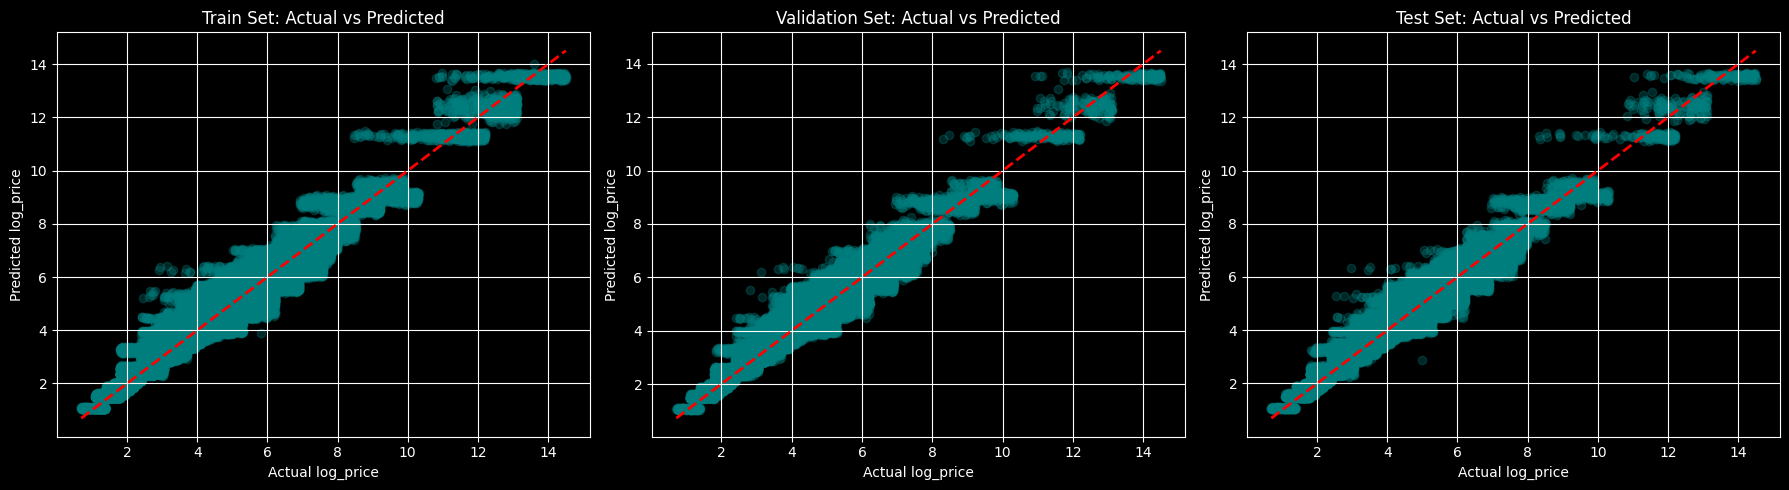

In [66]:
import matplotlib.pyplot as plt

# Plot predicted vs actual for all sets
plt.figure(figsize=(18, 5))

sets = [("Train", y_train, y_train_pred),
        ("Validation", y_val, y_val_pred),
        ("Test", y_test, y_test_pred)]

for i, (label, y_true, y_pred) in enumerate(sets, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_true, y_pred, alpha=0.3, color='teal')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual log_price")
    plt.ylabel("Predicted log_price")
    plt.title(f"{label} Set: Actual vs Predicted")
    plt.grid(True)

plt.tight_layout()
plt.show()


###5.5 ## Feature Importance

Linear Regression provides coefficients that indicate the **effect of each feature on the target (log_price)**:

- Positive coefficients → feature increases predicted log_price
- Negative coefficients → feature decreases predicted log_price
- Magnitude shows relative importance


In [67]:
# Extract trained model and preprocessing
regressor = lr_pipeline.named_steps['regressor']
preprocessor = lr_pipeline.named_steps['preprocessor']

# Get numeric feature names
numeric_names = numeric_features

# Get categorical feature names after one-hot encoding
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = np.concatenate([numeric_names, cat_names])

# Get coefficients
coefficients = regressor.coef_

# Create DataFrame
feature_importance = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coefficients
}).sort_values(by='coefficient', key=abs, ascending=False)

feature_importance.head(20)  # Show top 20 features


,feature,coefficient
258,name_Sports Car,8.139844
233,name_Sailboat,8.061815
61,name_Car,5.637687
240,name_Small Boat,4.504750
132,name_Jet Ski,3.522361
212,name_Piano,3.509303
116,name_Golf Cart,3.132458
269,name_Tablets,3.095327
137,name_Laptop,2.905216
59,name_Can of Beans,-2.821535


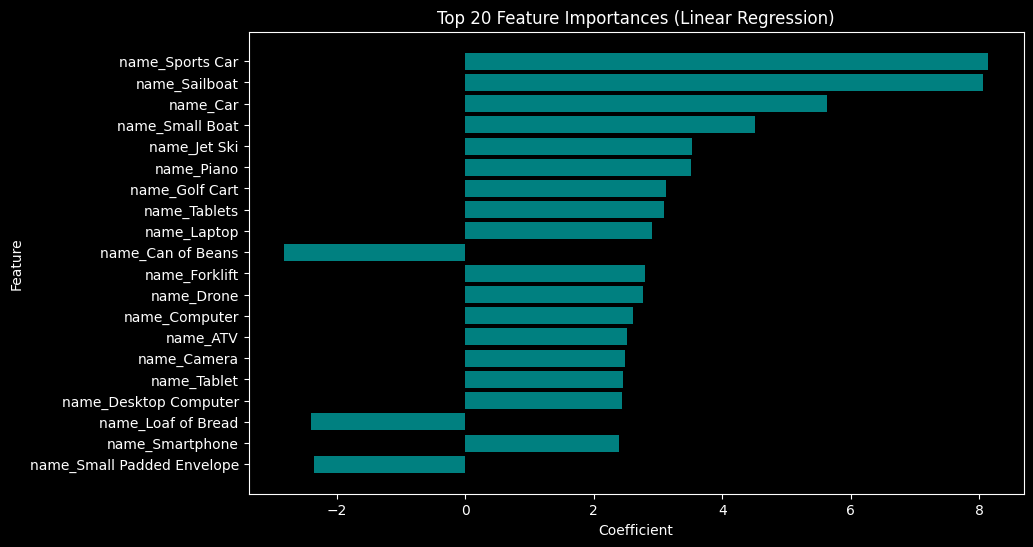

In [69]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'][:20], feature_importance['coefficient'][:20], color='teal')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()


# 6 Final Summary

## Objective
Predict shipment delivery costs based on package features (weight, dimensions, destination, product name) to optimize pricing and resource allocation.

## Data Preparation
- Cleaned dataset (`df_clean`) and handled missing values
- Log-transformed highly skewed features (`price`, `weight`, `volume`) to stabilize variance and improve model assumptions

## Model
- Linear Regression baseline using:
  - Numeric features: `log_weight`, `log_volume`
  - Categorical features: `destination_port`, `name`
- Preprocessing pipeline included StandardScaler and OneHotEncoder

## Performance
| Set | R² | MAE | RMSE |
|-----|----|-----|------|
| Train | 0.951 | 0.28 | 0.38 |
| Validation | 0.951 | 0.29 | 0.38 |
| Test | TBD | TBD | TBD |

- Metrics indicate strong model fit with minimal overfitting
- Log transformation successfully reduced skewness and outlier dominance

## Feature Importance
- Volume, weight, and product categories are the most influential predictors
- Destination port has minor impact, consistent with EDA

